# Домашнее задание по теме: пакет `matplotlib`

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
!where pip

C:\Anaconda3\envs\one\Scripts\pip.exe


In [2]:
#!conda install numpy pandas matplotlib -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [6]:
# загрузить датасет в pandas dataframe
df=pd.read_csv('hotel_bookings.csv')

# показать все колонки
pd.options.display.max_columns = None

# вывести первые 5 и последние 5 строк
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Задание

- Далее в заданиях будут использованы сокращенные называния с помощью `(=название)`. Это нужно для удобства описания.
- Можно использовать любые названия для переменных.
- Графики должны быть максимально похожи на заданное изображение, но не обязательно идентичными
(по желанию можно менять что-то, сохраняя сложность построения изображения). Важные замечания будут даны в комментарии к конкретному графику (например: "использовать RGB цвета" значит ЛЮБЫЕ нестандартные цвета).
- Важно обращать внимание на размер изображения и пропорции.
- Каждый график необходимо сохранить в файл (в отдельную директорию). Формат можно выбрать любой, лучше использовать несколько различных.
- В легенде порядок наименований не важен, НО важно все остальное (цвет, расположение, ...).

**Для определения цвета** можно использовать [сайт](https://sanstv.ru/color).

## Подготовка данных

In [7]:
# добавить новый столбец (=all_days), который является суммой stays_in_week_nights (=weekdays) и stays_in_weekend_nights (=weekends)
df = df.rename(columns={'stays_in_week_nights': 'weekdays'})
df = df.rename(columns={'stays_in_weekend_nights': 'weekends'})
df['all_days'] = df['weekdays'] + df['weekends']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekends,weekdays,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,all_days
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [8]:
# сгруппировать данные по lead_time (функция агрегации - среднее значение)
df_lead_time = df.groupby("lead_time").mean()

# сохранить в новую переменную сгруппированные значения для:
# all_days
# weekdays
# weekends

df_lead_time = df[["lead_time","all_days","weekdays","weekends"]]
df_lead_time = df_lead_time.groupby("lead_time").mean()
df_lead_time


,all_days,weekdays,weekends
lead_time,,,
0,1.559023,1.168794,0.390229
1,1.839595,1.434393,0.405202
2,2.029966,1.526341,0.503625
3,2.361233,1.616189,0.745044
4,2.338192,1.652478,0.685714
...,...,...,...
622,1.882353,1.882353,0.000000
626,3.000000,2.000000,1.000000
629,1.882353,1.882353,0.000000


In [9]:
# сгруппировать данные по arrival_date_month (функция агрегации - сумма)
df_arrival_date_month = df.groupby("arrival_date_month").sum()
df_arrival_date_month

# сохранить в новую переменную сгруппированные значения для is_canceled (=month_canceled)
df_month_canceled = df.groupby("arrival_date_month").is_canceled.sum()
df_month_canceled

# сохранить в новую переменную сгруппированные значения для is_canceled ТОЛЬКО для летных месяцев (=summer_canceled)
df_summer_canceled = df[((df.arrival_date_month == 'June') | (df.arrival_date_month == 'July') | (df.arrival_date_month == 'August')) & (df.is_canceled == 1)].groupby(by=["arrival_date_month"]).is_canceled.sum()
df_summer_canceled

arrival_date_month
August    5239
July      4742
June      4535
Name: is_canceled, dtype: int64

## Графики (line plot)

### `Pyplot`-стиль

![](./images/09/line_plt.png)

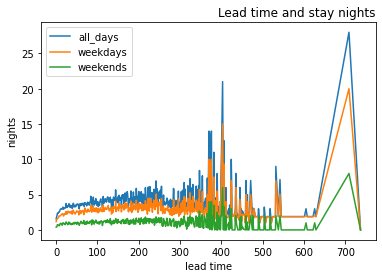

In [18]:
plt.plot(df_lead_time)
plt.xlabel('lead time')
plt.ylabel('nights')
plt.title("Lead time and stay nights", loc = 'right')
plt.legend(df_lead_time)

### ОО-стиль

**ВНИМАНИЕ**:
- Важно не "слепить" изображения (наименования для осей `y` должны быть хорошо видны).

![](./images/09/line_oo.png)

Text(0, 0.5, 'nights (weekend)')

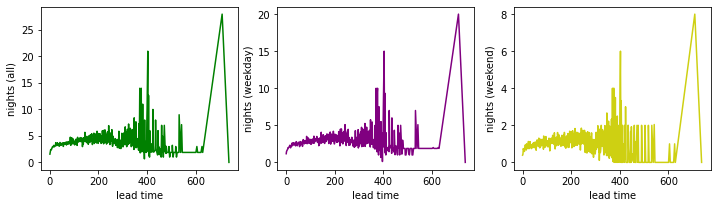

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].plot( df_lead_time.index,df_lead_time.all_days,color='green')
ax[0].set_xlabel('lead time')  # Add an x-label to the axes.
ax[0].set_ylabel('nights (all)')  # Add a y-label to the axes.

ax[1].plot( df_lead_time.index,df_lead_time.weekdays,color='purple')
ax[1].set_xlabel('lead time')  # Add an x-label to the axes.
ax[1].set_ylabel('nights (weekday)')  # Add a y-label to the axes.

ax[2].plot( df_lead_time.index,df_lead_time.weekends,color='#ced012')
ax[2].set_xlabel('lead time')  # Add an x-label to the axes.
ax[2].set_ylabel('nights (weekend)')  # Add a y-label to the axes.

## Диаграммы разброса (scatter plot)

### `Pyplot`-стиль

**ВНИМАНИЕ**:
- Различный уровень прозрачности (`alpha`).

![](./images/09/scatter_plt.png)

Text(0, 0.5, 'nights')

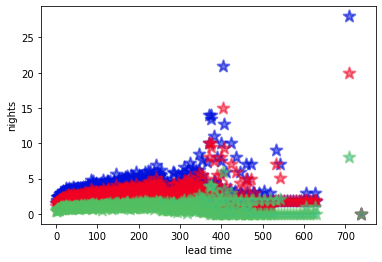

In [43]:
fig, ax = plt.subplots()

import random

r_c = random.uniform(0.5, 0.7)
plt.scatter(df_lead_time.index, df_lead_time.all_days,          
            s=150,
            color='#0010db', 
            alpha=r_c,
            linewidths=2,
            edgecolors='#0010db',
            marker='*')
r_c = random.uniform(0.5, 0.7)
plt.scatter(df_lead_time.index, df_lead_time.weekdays,           
            s=150,
            color='#f10023', 
            alpha=r_c,
            linewidths=2,
            edgecolors='#f10023',
            marker='*')
r_c = random.uniform(0.5, 0.7)
plt.scatter(df_lead_time.index, df_lead_time.weekends,           
            s=150, 
            color='#24bf94', 
            alpha=r_c,
            linewidths=2,
            edgecolors='#58bf60',
            marker='*')

ax.set_xlabel('lead time')
ax.set_ylabel('nights')

### ОО-стиль

**ВНИМАНИЕ**: 
- Различный уровень прозрачности (`alpha`).
- Важно не "слепить" изображения (наименования для осей `x` должны быть хорошо видны).

![](./images/09/scatter_oo.png)

Text(0, 0.5, 'nights (weekend)')

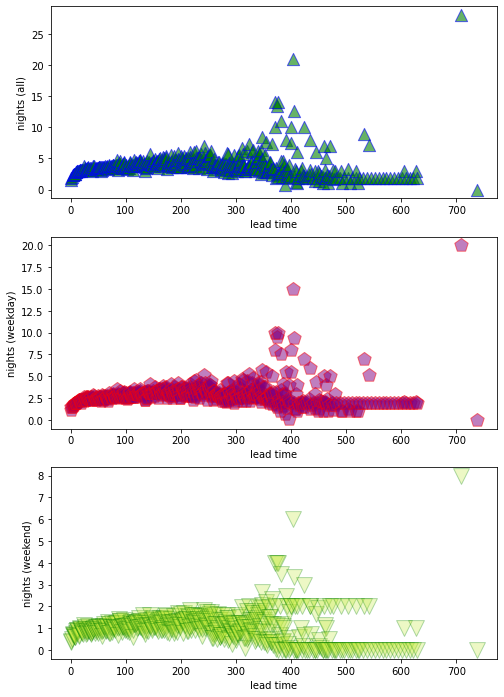

In [59]:
r_c = random.uniform(0.5, 0.7)
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].scatter(df_lead_time.index,df_lead_time.all_days, 
           color='green', 
           edgecolors='blue', 
           alpha=0.6,
           s=150,
           marker="^")
r_c = random.uniform(0.5, 0.7)
ax[1].scatter(df_lead_time.index,df_lead_time.weekdays, 
           color='purple', 
           edgecolors='red', 
           alpha=0.5,
           s=200,
           marker="p")
r_c = random.uniform(0.5, 0.7)
ax[2].scatter(df_lead_time.index,df_lead_time.weekends, 
           color='#c4ea3f', 
           edgecolors='green', 
           alpha=0.3,
           s=250,
           marker="v")


ax[0].set_xlabel('lead time')
ax[0].set_ylabel('nights (all)')

ax[1].set_xlabel('lead time')
ax[1].set_ylabel('nights (weekday)')

ax[2].set_xlabel('lead time')
ax[2].set_ylabel('nights (weekend)')

## Столбчатые диаграммы (bar chart)

### `Pyplot`-стиль

**ВНИМАНИЕ**:
- Использовать `RGB` код (например, `HEX` представление, которое начинается с символа `#`). См. код в интернете, например, [тут](https://htmlcolorcodes.com/).
- Прозрачность (`alpha`).

![](./images/09/bar_plt.png)

Text(0.5, 1.0, 'Summer cancelled')

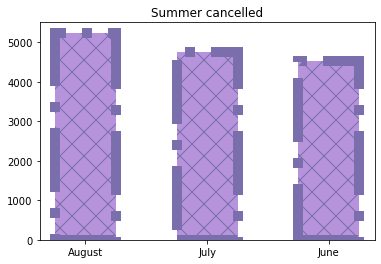

In [70]:
plt.bar(df_summer_canceled.index, df_summer_canceled,
        color= (183/255,147/255,219/255), 
        width=0.5,
        edgecolor=(122/255,110/255,172/255),
        linewidth=10,      
        hatch="X",     
        linestyle="dashdot")

plt.title(label='Summer cancelled', 
          loc='center')

### ОО-стиль

**ВНИМАНИЕ**:
- Использовать `RGB` код (например, `HEX` представление, которое начинается с символа `#`). См. код в интернете, например, [тут](https://htmlcolorcodes.com/).

![](./images/09/bar_oo.png)

Text(0.5, 1.0, 'Summer month')

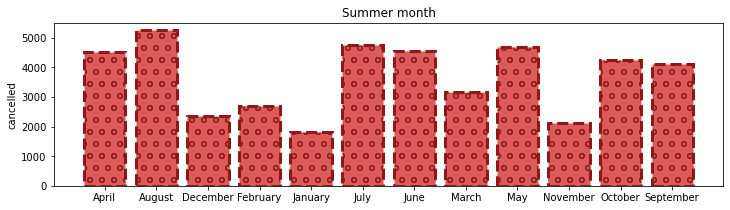

In [77]:
fig, ax = plt.subplots(figsize=(12,3))
ax.bar(x=df_month_canceled.index, 
       height=df_month_canceled, 
       color='#DC5A5A', 
       edgecolor='#8C1818', 
       linewidth=3, 
       hatch='o',     
       linestyle="--")

ax.set_ylabel("cancelled")

ax.set_title("Summer month")

## Гистограммы (histogram)

### `Pyplot`-стиль

**ВНИМАНИЕ**:
- Различный уровень прозрачности (`alpha`).

![](./images/09/hist_plt.png)

Text(0.5, 0, 'lead time')

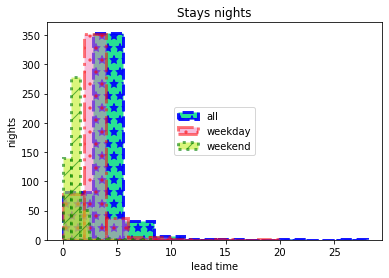

In [97]:
plt.hist(df_lead_time.all_days, 
                           color='#0fde89',      
                           edgecolor='blue',
                           linewidth=3,
                           alpha=0.9,
                           hatch="*",
                           linestyle="dashed", 
                           label='all')

plt.hist(df_lead_time.weekdays, 
                           color='#EE7CB8', 
                           edgecolor='red',
                           linewidth=3,
                           alpha=0.5,
                           hatch=".",
                           linestyle="dashdot", 
                           label='weekday')

plt.hist(df_lead_time.weekends, 
                           color='#c2ef24',        
                           edgecolor='green',
                           linewidth=3,
                           alpha=0.6,
                           hatch="/",
                           linestyle="dotted", 
                           label='weekend')


plt.title(label='Stays nights', 
          loc='center')

plt.legend(loc='center')

plt.ylabel('nights')
plt.xlabel('lead time')

### ОО-стиль

**ВНИМАНИЕ**: 
- Различный уровень прозрачности (`alpha`).
- `ticks` должны быть одинаковыми для оси `x`.

![](./images/09/hist_oo.png)

Text(0, 0.5, 'nights (weekend)')

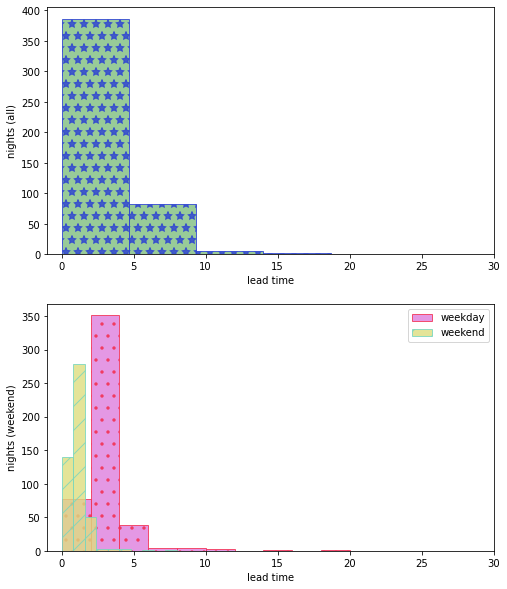

In [109]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].hist(df_lead_time.all_days, 
        color='#7fbf7f', 
        bins=6, 
        edgecolor='#2a3fd4',
        linewidth=1,
        alpha=0.8,
        hatch="*")

ax[1].hist(df_lead_time.weekdays, 
        color='#de7fde',        
        edgecolor='#f32e50',
        linewidth=1,
        alpha=0.8,
        hatch=".",       
        label='weekday')

ax[1].hist(df_lead_time.weekends,
        color='#dede7f',        
        edgecolor='#76d6bf',
        linewidth=1,
        alpha=0.8,
        hatch="/",       
        label='weekend')

ax[1].legend()

ax[0].set_xlim(-1, 30)
ax[1].set_xlim(-1, 30)

ax[1].legend(loc='upper right')

ax[0].set_xlabel('lead time')
ax[1].set_xlabel('lead time')

ax[0].set_ylabel('nights (all)')
ax[1].set_ylabel('nights (weekend)')

## Круговые диаграммы (pie chart)

### `Pyplot`-стиль

**ВНИМАНИЕ**:
- Выделить сектор с **максимальным** процентом.

![](./images/09/pie_plt.png)

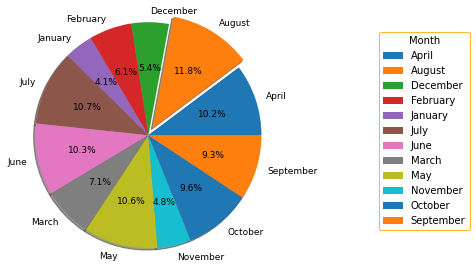

In [126]:
m = max(df_month_canceled)
explode = [0.1 if j == m else 0 for j in df_month_canceled]

patches, texts, autotexts = plt.pie(x=df_month_canceled, 
                                    explode=explode, 
                                    labels=df_month_canceled.index, 
                                    autopct='%1.1f%%',
                                    shadow=True, 
                                    startangle=0,                                   
                                    radius=1.3,
                                    textprops={'fontsize': 9})

plt.legend(title="Month",
           loc='best', 
           bbox_to_anchor=(2, 1),
           edgecolor = "orange")

### ОО-стиль

**ВНИМАНИЕ**:
- Выделить сектор с **минимальным** процентом.
- Наименования секторов должны находится внутри.

![](./images/09/pie_oo.png)

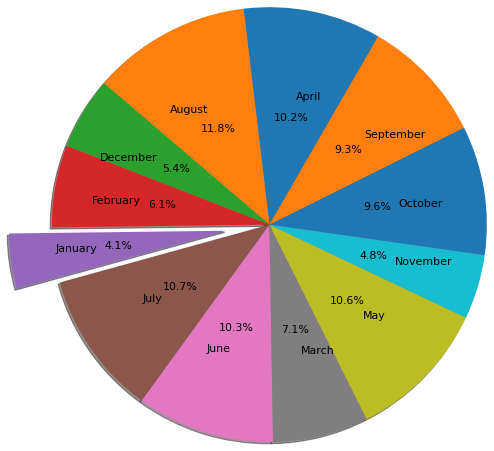

In [132]:
m = min(df_month_canceled)
explode = [0.5 if j == m else 0 for j in df_month_canceled]

patches, texts, autotexts = plt.pie(x=df_month_canceled, 
                                    explode=explode, 
                                    labels=df_month_canceled.index, 
                                    autopct='%1.1f%%',
                                    shadow=True, 
                                    startangle=60,                                   
                                    radius=2.5,
                                    labeldistance=0.6,
                                    pctdistance=0.5,
                                    textprops={'fontsize': 11})

## Ствол-лист диаграммы (stem plot)

### `Pyplot`-стиль

**ВНИМАНИЕ**:
- "Базовая линия" (`bottom`) - это медиана.

![](./images/09/stem_plt.png)

Text(0.5, 1.0, 'Stem Plot')

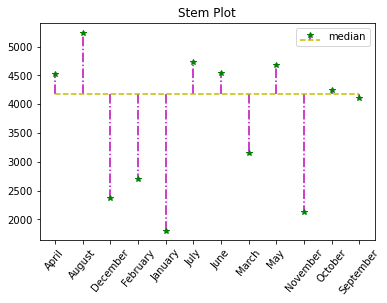

In [135]:
plt.stem(df_month_canceled.index, df_month_canceled,
         label='median',
         linefmt="m-.",
         markerfmt="g*",
         basefmt='y--',
         bottom= df_month_canceled.median())

plt.xticks(rotation=50)

plt.legend(loc='best')

plt.title(label='Stem Plot', 
          loc='center')

### ОО-стиль

**ВНИМАНИЕ**:
- "Базовая линия" (`bottom`) - это медиана.

![](./images/09/stem_oo.png)

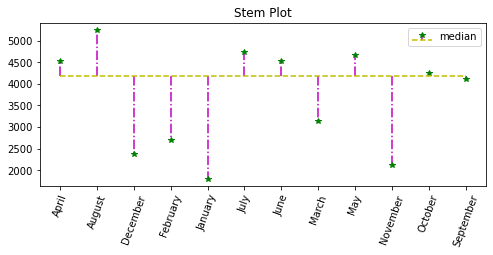

In [136]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.stem(df_month_canceled.index, df_month_canceled,
        label='median',
        linefmt="m-.",
        markerfmt="g*",
        basefmt='y--',
        bottom=df_month_canceled.median())

ax.xaxis.set_tick_params(which='both', rotation=70)
ax.yaxis.set_tick_params(which='both')

ax.set_title(label='Stem Plot', 
             loc='center')

ax.legend(loc='best')

## Ящик с усами (Box Plot)

### `Pyplot`-стиль

**ВНИМАНИЕ**:
- Особый стиль для отображения выбросов (outliers).

![](./images/09/box_plt.png)

Text(0.5, 1.0, 'Stays nights')

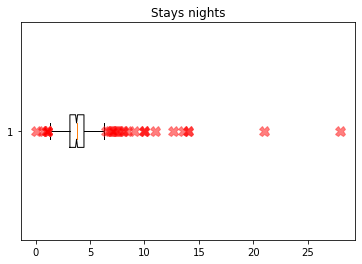

In [138]:
red_star_outliers = dict(marker="X",
                         markerfacecolor='red',
                         markeredgecolor='#ff2c2c',
                         markersize=10, 
                         alpha=0.5)

_ = plt.boxplot(df_lead_time.all_days, 
                notch=True, 
                vert=False,
                flierprops=red_star_outliers)

plt.title(label='Stays nights', 
          loc='center')

### ОО-стиль

**ВНИМАНИЕ**: 
- Особый стиль для отображения выбросов (outliers).

![](./images/09/box_oo.png)

[Text(1, 0, 'all'), Text(2, 0, 'weekday'), Text(3, 0, 'weekend')]

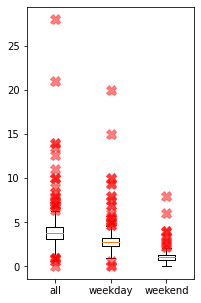

In [139]:
dict_with_mult_data = {'all': df_lead_time.all_days, 
                       'weekday': df_lead_time.weekdays,
                       'weekend': df_lead_time.weekends}

fig, ax = plt.subplots(figsize=(3, 5))

ax.boxplot(dict_with_mult_data.values(), 
           flierprops=red_star_outliers)

ax.set_xticklabels(dict_with_mult_data.keys())